<a href="https://colab.research.google.com/github/amien1410/colab-notebooks/blob/main/Colab_Decision_Tree_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's dive into our tutorial on **Decision Tree Regression with Scikit-learn**! 🌳

**What** are we learning? We'll explore Decision Tree Regression, a machine learning algorithm used for predicting continuous values. 📈

**Why** is this useful? Decision trees are intuitive and can capture complex relationships in data. They're great for understanding which factors influence a prediction. 🤔

**Who** can benefit from this? Anyone interested in predictive modeling, especially those working with datasets like the one we'll use from YBIFoundation, which is about predicting the chance of admission based on various factors. 🎓

**When** would you use this? When you need a model that's easy to interpret and can handle both linear and non-linear patterns in your data. 🕰️

**Where** does this fit in? This is a fundamental algorithm in the world of machine learning and a great stepping stone to more complex models. 🗺️

**How** do we implement this? We'll use the powerful Scikit-learn library in Python, which provides efficient tools for building and training decision tree models. 🐍

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

With the libraries ready, let's load our data! 🚀

We'll read the dataset directly from the web using pandas. Then, we'll take a peek at the first few rows to see what the data looks like. This helps us get familiar with the columns and the type of information they hold. 😊

In [2]:
# read data
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Admission%20Chance.csv')
df.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Now that we have explored our data a bit, it's time to prepare it for our Decision Tree Regression model. This involves separating our data into two parts:

1.  **The target variable (y):** This is the value we want to predict. In this dataset, it's the 'Chance of Admit'.
2.  **The features (X):** These are the input variables that our model will use to make predictions. We'll use all the columns except 'Serial No' (which is just an identifier) and the target variable itself.

This step is crucial for setting up our data correctly before training the model. 👍

In [3]:
# define target and features
y = df['Chance of Admit ']
X = df.drop(['Serial No','Chance of Admit '],axis=1)

Next, we'll split our data into training and testing sets. 🏋️‍♀️

-   The **training set** is what the model learns from.
-   The **testing set** is used to evaluate how well the model makes predictions on data it hasn't seen before.

This split helps us get a realistic idea of our model's performance. We'll use a common split ratio, like 80% for training and 20% for testing.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2529)

With our data split into training and testing sets, we are now ready to train our Decision Tree Regression model. 🌳

We'll import the `DecisionTreeRegressor` from scikit-learn and then fit the model to our training data (`X_train` and `y_train`). This is where the model learns the relationships between the features and the target variable. ✨

In [5]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor model
model = DecisionTreeRegressor(max_depth=3, random_state=2529)

# Train the model
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=2529)

In [6]:
# evaluate the model on training sample
model.score(X_train,y_train)

0.7738322816632399

After training our model, it's helpful to look at the hyperparameters that were used. These are settings that are not learned from the data but are set before training.

We can use the `.get_params()` method to see the current values of all the hyperparameters of our trained model. This is useful for understanding the model's configuration or if we plan to tune these parameters later. 🛠️

In [7]:
# model hyperparameters
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 2529,
 'splitter': 'best'}

After training a model with default or initial hyperparameters, we often want to find the best set of hyperparameters to optimize its performance. This process is called hyperparameter tuning.

We can define a grid of hyperparameters to search over. In this case, we are looking at different values for `max_depth` and `criterion` for our Decision Tree Regressor.

In [8]:
# hyperparameters selection
params = {'model__max_depth' : [2,3,4,5,6,7,8, 9, 10],
        'model__criterion' : ['squared_error', 'absolute_error'],
        'model__random_state' : [2529]}

Before we dive into hyperparameter tuning with GridSearchCV, let's set up a **pipeline**. 🏗️

A pipeline helps us chain together multiple steps in our machine learning workflow. In this case, we're putting our `DecisionTreeRegressor` model inside a pipeline. This is particularly useful for GridSearchCV because it ensures that the entire process (including the model with its hyperparameters) is treated as a single unit during the hyperparameter search. It helps prevent data leakage and makes the tuning process cleaner.

In [9]:
# import pipeline
from sklearn.pipeline import Pipeline

# define pipe line
pipe = Pipeline([('model', model)])

Now that we have defined our pipeline and the grid of hyperparameters to search, let's perform the **GridSearchCV**. 🕵️‍♀️

This process will train multiple models, each with a different combination of hyperparameters from the `params` dictionary, using cross-validation (`cv=5`). After evaluating each combination, GridSearchCV will identify and store the `best_params_` – the set of hyperparameters that resulted in the highest performance score on the training data.

In [10]:
# grid search cv
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe,params,cv=5)

# train grid search
grid.fit(X_train,y_train)

# find best parama
grid.best_params_

{'model__criterion': 'squared_error',
 'model__max_depth': 3,
 'model__random_state': 2529}

We've found the best hyperparameters! Now, let's use the model that was trained with these best parameters to make predictions on our test set (`X_test`). This is the final evaluation step to see how well our optimized model performs on unseen data.

In [11]:
# Get the best model from GridSearchCV
best_model = grid.best_estimator_

# fit best estimator
best_model.fit(X_train,y_train)

# Make predictions on the test set using the best model
y_pred_tuned = best_model.predict(X_test)

Now that we have predictions from the model with the best hyperparameters, let's evaluate its performance on the test set using the same metrics as before: Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²).

Comparing these metrics to the initial model's performance will show us the impact of hyperparameter tuning.

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the tuned model's predictions
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("Performance of the Tuned Model:")
print(f"Mean Absolute Error (MAE): {mae_tuned:.4f}")
print(f"Mean Squared Error (MSE): {mse_tuned:.4f}")
print(f"R-squared (R²): {r2_tuned:.4f}")

# You can also compare with the initial model's performance if you stored those metrics
# print("\nPerformance of the Initial Model:")
# print(f"Mean Absolute Error (MAE): {mae:.4f}")
# print(f"Mean Squared Error (MSE): {mse:.4f}")
# print(f"R-squared (R²): {r2:.4f}")

Performance of the Tuned Model:
Mean Absolute Error (MAE): 0.0572
Mean Squared Error (MSE): 0.0058
R-squared (R²): 0.7533


Now that we've found the best hyperparameters (which in this case match our initial model's `max_depth=3` and `random_state=2529`), let's visualize the decision tree with these parameters.

Visualizing the tree helps us see the splits the model makes based on the features and how it arrives at a predicted 'Chance of Admit'. Each node shows the condition used for splitting, the number of samples in that node, and the predicted value for that node. The `filled=True` option colors the nodes based on the predicted value, and `feature_names=X.columns` labels the features.

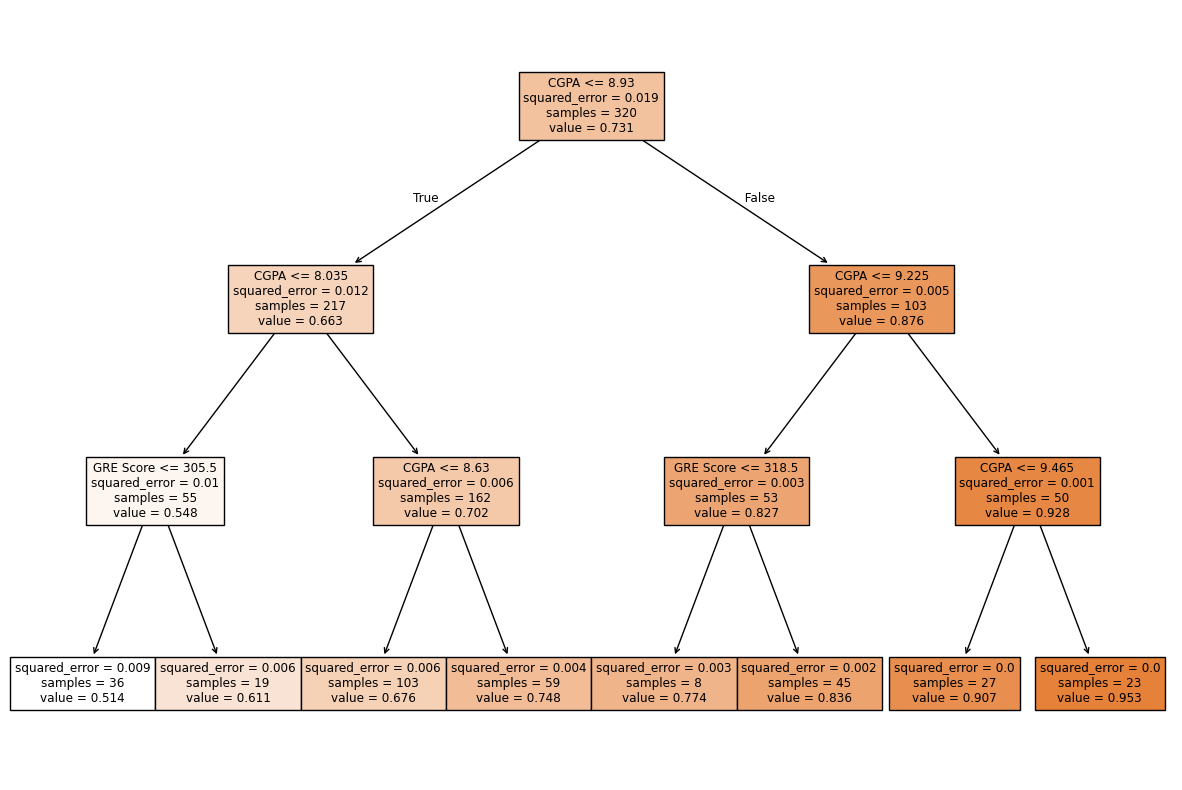

In [14]:
# plot tree
from sklearn.tree import plot_tree
fig,ax = plt.subplots(figsize=(15,10))
final=DecisionTreeRegressor(max_depth=3, random_state=2529)
final.fit(X_train,y_train)
plot_tree(final,feature_names=X.columns,filled=True);

After training a model, you'll often want to save it so you can use it later without retraining. This is especially helpful when you want to deploy your model in an application.

We can use the `pickle` library in Python to serialize (save) our trained model to a file and then deserialize (load) it back when we need it.

In [15]:
# save model
import pickle

# create an iterator object with write permission - model.pickle
with open('dtr_pkl', 'wb') as files:
    pickle.dump(best_model, files)

# load saved model
with open('dtr_pkl' , 'rb') as f:
    dtr2 = pickle.load(f)

# predict with saved model
dtr2.predict(X_test)

array([0.67572816, 0.67572816, 0.67572816, 0.67572816, 0.51444444,
       0.90703704, 0.9526087 , 0.74779661, 0.836     , 0.67572816,
       0.61052632, 0.74779661, 0.51444444, 0.77375   , 0.836     ,
       0.67572816, 0.67572816, 0.67572816, 0.74779661, 0.836     ,
       0.61052632, 0.836     , 0.836     , 0.9526087 , 0.74779661,
       0.61052632, 0.67572816, 0.51444444, 0.51444444, 0.61052632,
       0.51444444, 0.74779661, 0.74779661, 0.74779661, 0.61052632,
       0.51444444, 0.51444444, 0.836     , 0.90703704, 0.836     ,
       0.74779661, 0.67572816, 0.67572816, 0.90703704, 0.74779661,
       0.74779661, 0.9526087 , 0.90703704, 0.61052632, 0.51444444,
       0.67572816, 0.67572816, 0.836     , 0.51444444, 0.67572816,
       0.74779661, 0.67572816, 0.67572816, 0.836     , 0.67572816,
       0.67572816, 0.9526087 , 0.67572816, 0.67572816, 0.74779661,
       0.67572816, 0.61052632, 0.9526087 , 0.61052632, 0.90703704,
       0.61052632, 0.9526087 , 0.51444444, 0.67572816, 0.51444

## Conclusion: What We've Learned and Where to Go Next! 🎉

Congratulations! You've successfully completed this tutorial on Decision Tree Regression using Scikit-learn. You've learned how to:

*   Load and prepare your data for regression.
*   Split your data into training and testing sets.
*   Train a Decision Tree Regressor model.
*   Evaluate your model's performance using metrics like MAE, MSE, and R².
*   Perform hyperparameter tuning with GridSearchCV to find the best model settings.
*   Visualize the decision tree to understand its structure.
*   Save and load your trained model for future use.

### What You Can Do Next:

1.  **Interpret the Tree:** Spend some time analyzing the visualized decision tree. Which features are at the top of the tree? This indicates their importance in the prediction process.
2.  **Experiment with Data:** Try feature engineering or explore different ways to preprocess your data to see if it improves model performance.
3.  **Compare with Other Models:** Apply other regression algorithms (like Linear Regression, Support Vector Regression, or Random Forest Regression) to this dataset and compare their results to the Decision Tree Regressor.
4.  **Explore Ensemble Methods:** Learn about ensemble techniques like Random Forests or Gradient Boosting, which build upon decision trees to achieve higher accuracy.
5.  **Deploy Your Model:** Explore how to deploy your saved model so it can make predictions on new, real-world data.

### Projects Where This Model Can Be Applied:

Decision Tree Regression is a versatile algorithm that can be applied to a wide range of projects where you need to predict a continuous outcome and want an interpretable model. Some examples include:

*   **Real Estate Price Prediction:** Predicting house prices based on features like size, location, number of bedrooms, etc.
*   **Stock Price Forecasting:** Predicting future stock prices based on historical data and market indicators.
*   **Sales Prediction:** Forecasting sales based on advertising spend, seasonality, promotions, etc.
*   **Medical Cost Prediction:** Estimating medical costs based on patient characteristics and treatment details.
*   **Environmental Modeling:** Predicting factors like air quality or water levels based on various environmental parameters.

Keep practicing and exploring! The world of machine learning is vast and exciting. Happy coding! 😊